# importing required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# ml modules
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# importing data set from  kaggle

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## preparing x and y variables

In [ ]:
X = df.drop(columns=['math score'], axis=1)
Y = df['math score']

In [ ]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
Y

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


creationn of transformer colmns

In [ ]:
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns

In [ ]:
num_trans = StandardScaler()
oh_trans = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_trans, cat_cols),
        ('StandardScaler', num_trans, num_cols)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(1000, 19)

# train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

 evalution fiction  of models

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2, rmse

In [ ]:
models ={
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
}

model_list = []
r2_list = []

In [ ]:
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train, y_train)

  # make prediction
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Evaluate model
  model_train_mae, model_train_rmse, model_train_r2, model_train_rmse = evaluate_model(y_train, y_train_pred)
  model_test_mae, model_test_rmse, model_test_r2, model_test_rmse = evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.2592
- Mean Absolute Error: 4.1681
- R2 Score: 0.8815
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6218
- Mean Absolute Error: 4.5734
- R2 Score: 0.8524


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5500
- Mean Absolute Error: 5.1997
- R2 Score: 0.8162
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5967
- Mean Absolute Error: 5.1005
- R2 Score: 0.7967


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2594
- Mean Absolute Error: 4.1672
- R2 Score: 0.8815
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6191
- Mean Absolute Error: 4.5672
- R2 Score: 0.8525


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7614
- Mean Absolute Error: 4.5627
- R2 Score: 0.8578
--------------------------

# Results

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.852517
0,LinearRegression,0.852377
5,RandomForestRegressor,0.805171
1,Lasso,0.796734
3,KNeighborsRegressor,0.762676
4,DecisionTreeRegressor,0.638488


# Linear Regression

In [ ]:
lin_model = Ridge()
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.25


# Plotting results

Text(0, 0.5, 'Predicted')

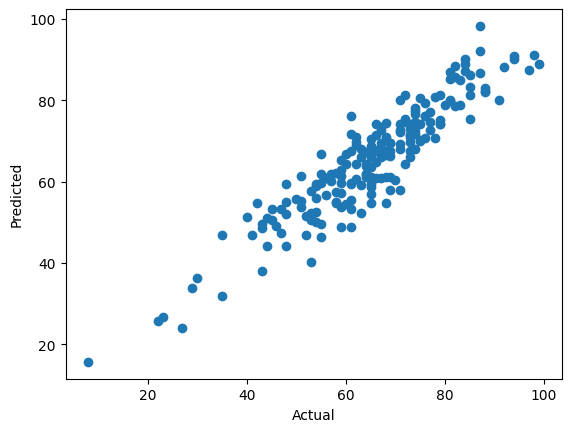

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

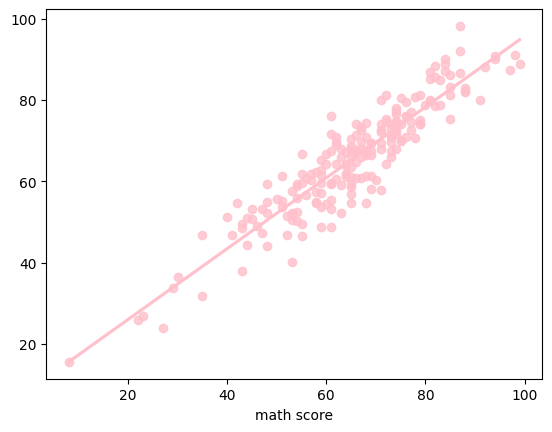

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='pink')

difference between actual and predicted values

In [ ]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
519,67,65.995813,1.004187
837,75,69.974505,5.025495
208,74,68.010062,5.989938
525,68,71.027742,-3.027742
978,55,49.564405,5.435595
...,...,...,...
647,64,61.872537,2.127463
481,52,46.897148,5.102852
134,74,73.631963,0.368037
366,69,58.027507,10.972493
